In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mppi import Parsers as P, Utilities as U
from mppi.Utilities import Constants as C
from mppi.Utilities import Dos

h_red = C.Planck_reduced_ev_ps*1e3 # hbar in eV*fs
h = C.Planck_ev_ps*1e3 # h in eV*fs

# Analysis of the JDOS

We study the JDOS of the transition.

In [3]:
ref_run_dir = 'RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm'
#ref_outpath = 'RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4_extended-bands/'
ref_outpath = 'RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/'

In [4]:
scissor = 0.9548 # (eV) (taken from QE_Analysis it gives a direct gap of 1.42 eV)
energy = 1.46 # eV energy of the pulse
omega = energy/h_red # angular frequency of the pulse
period = h/energy # period of the pulse fs

In [5]:
ref_results = P.YamboParser.from_path(ref_run_dir,ref_outpath)

Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.polarization
Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.carriers
Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.external_field
Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.current
Parse file : RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/SAVE/ns.db1
Parse file : RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/ndb.dipoles
Spin dipoles not found in the ndb.dipoles
Parse file : RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/ndb.RT_G_PAR


In [21]:
trans_vtoc1 = ref_results.dft.get_transitions(initial=[1,2,3],final=[4],set_scissor=scissor)
trans_vtoc2 = ref_results.dft.get_transitions(initial=[1,2,3],final=[5],set_scissor=scissor)
trans_c1toc2 = ref_results.dft.get_transitions(initial=[4],final=[5],set_scissor=scissor)

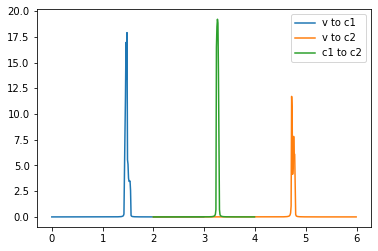

In [25]:
dos = Dos()
dos.append(trans_vtoc1.flatten(),minVal=0,maxVal=3,eta=1e-3,label='v to c1')
dos.append(trans_vtoc2.flatten(),minVal=2,maxVal=6,eta=1e-3,label='v to c2')
dos.append(trans_c1toc2.flatten(),minVal=2,maxVal=4,eta=1e-3,label='c1 to c2')
dos.plot(plt)

From this plot we see that if we use this k sampling we pulse is not able to
activate transition different from the leading ones even if we consider pulses with
large energy spread.